### Advanced Machine Learning 2024
#### [P1] Piwko, Skonieczka, Zakrzewski

In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from logistic_regression.models.logistic_regression import LogisticRegression
from logistic_regression.optimizers import ADAM, IWLS, SGD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

sns.set_theme(style="whitegrid", palette="muted", font_scale=0.9)
np.random.seed(0)

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [2]:
# small datasets
df_1 = pd.read_csv("AML_datasets/diabetes.csv")
X_1 = df_1.drop(columns="Outcome").to_numpy()
y_1 = df_1[["Outcome"]].to_numpy()

df_2 = pd.read_csv("AML_datasets/banknote_authentication.csv")
X_2 = df_2.drop(columns="class").to_numpy()
y_2 = df_2[["class"]].to_numpy()

df_3 = pd.read_csv("AML_datasets/Abalone.csv")
X_3 = df_3.drop(columns="Rings").to_numpy()
y_3 = df_3[["Rings"]].to_numpy()

# large datasets
df_4 = pd.read_csv("AML_datasets/NewsPopularity.csv")
X_4 = df_4.drop(columns=" shares").to_numpy()
y_4 = df_4[[" shares"]].to_numpy()

df_5 = pd.read_csv("AML_datasets/creditcard.csv")
X_5 = df_5.drop(columns="Class").to_numpy()
y_5 = df_5[["Class"]].to_numpy()

df_6 = pd.read_csv("AML_datasets/malware.csv")
X_6 = df_6.drop(columns="classification").to_numpy()
y_6 = df_6[["classification"]].to_numpy()

df_7 = pd.read_csv("AML_datasets/students.csv")
X_7 = df_7.drop(columns="Target").to_numpy()
y_7 = df_7[["Target"]].to_numpy()

df_8 = pd.read_csv("AML_datasets/drugs.csv")
X_8 = df_8.drop(columns="amphet").to_numpy()
y_8 = df_8[["amphet"]].to_numpy()

df_9 = pd.read_csv("AML_datasets/higgs_boson.csv")
X_9 = df_9.drop(columns="class").to_numpy()
y_9 = df_9[["class"]].to_numpy()

X_list = [X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9]
y_list = [y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9]

### 3.1 - stopping rule

In [3]:
# the stopping rule is implemented within the .fit method of the LogisticRegression class
# ITERATIONS, MIN_DELTA and PATIENCE are parameters of the stopping rule

# maximum total number of iterations
ITERATIONS = 500

# the minimum change in the cost function to define convergence
MIN_DELTA = 0.0005

# the number of iterations with no improvement to wait before early stopping
PATIENCE = 25

### 3.2, 3.3, 3.4, 3.5 - running experiments

In [6]:
NUMBER_OF_SPLITS = 5

In [ ]:
results_records = []

for set_idx, (X, y) in enumerate(zip(X_list, y_list)):
    set_idx += 1
    is_small_dataset = set_idx <= 3

    for split in range(NUMBER_OF_SPLITS):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

        # logistic regression
        for optimizer_class, optimizer_name in zip([IWLS, SGD, ADAM], ["IWLS", "SGD", "ADAM"]):
            lr = LogisticRegression(optimizer_class())
            lr.fit(X=X_train, y=y_train, iterations=ITERATIONS, min_delta=MIN_DELTA, patience=PATIENCE)
            y_pred = lr.predict(X_test)
            bacc = balanced_accuracy_score(y_test, y_pred)
            results_records.append({
                "dataset": set_idx,
                "split": split,
                "optimizer": optimizer_name,
                "balanced_accuracy": bacc,
                "cost_in_iterations": list(lr.cost_in_iterations),
            })

            # 3.5 - interactions (only small datasets)
            if is_small_dataset:
                lr = LogisticRegression(optimizer_class(), interactions=True)
                lr.fit(X=X_train, y=y_train, iterations=ITERATIONS, min_delta=MIN_DELTA, patience=PATIENCE)
                y_pred = lr.predict(X_test)
                bacc = balanced_accuracy_score(y_test, y_pred)
                results_records.append({
                    "dataset": set_idx,
                    "split": split,
                    "optimizer": optimizer_name + "+INT",
                    "balanced_accuracy": bacc,
                    "cost_in_iterations": list(lr.cost_in_iterations),
                })

        # 3.4 - 4 popular classification methods
        # lda
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train, y_train)
        y_pred = lda.predict(X_test)
        bacc = balanced_accuracy_score(y_test, y_pred)
        results_records.append({
            "dataset": set_idx,
            "split": split,
            "optimizer": "LDA",
            "balanced_accuracy": bacc,
        })

        # qda
        qda = QuadraticDiscriminantAnalysis()
        qda.fit(X_train, y_train)
        y_pred = qda.predict(X_test)
        bacc = balanced_accuracy_score(y_test, y_pred)
        results_records.append({
            "dataset": set_idx,
            "split": split,
            "optimizer": "QDA",
            "balanced_accuracy": bacc,
        })

        # decision tree
        tree = DecisionTreeClassifier(max_depth=16, min_samples_split=8, min_samples_leaf=8, max_features="log2", random_state=0)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        bacc = balanced_accuracy_score(y_test, y_pred)
        results_records.append({
            "dataset": set_idx,
            "split": split,
            "optimizer": "DecisionTree",
            "balanced_accuracy": bacc,
        })

        # random forest
        rf = RandomForestClassifier(n_estimators=50, max_depth=6, min_samples_split=8, min_samples_leaf=8, max_features="log2", random_state=0)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        bacc = balanced_accuracy_score(y_test, y_pred)
        results_records.append({
            "dataset": set_idx,
            "split": split,
            "optimizer": "RandomForest",
            "balanced_accuracy": bacc,
        })

# saving results
df = pd.DataFrame(results_records)
df.to_csv("results/task3_experiments_results.csv", index=False)

joblib.dump(df, "results/task3_experiments_results.pkl")

In [3]:
# loading results
df = joblib.load("results/task3_experiments_results.pkl")

### 3.2 - performance measurement

In [4]:
(
    df
        .groupby(["dataset", "optimizer"])
        ["balanced_accuracy"]
        .mean()
        .reset_index()
        .pivot_table(index="dataset", columns="optimizer", values="balanced_accuracy")
        .loc[:, ["IWLS", "SGD", "ADAM"]]
        .style
        .format(precision=3)
        .background_gradient(vmin=0.5, vmax=1.5, cmap="Greens")
)

optimizer,IWLS,SGD,ADAM
dataset,,,
1,0.533,0.571,0.556
2,0.931,0.953,0.952
3,0.765,0.708,0.739
4,0.501,0.512,0.552
5,0.500,0.501,0.831
6,0.500,0.501,0.542
7,0.500,0.552,0.788
8,0.584,0.677,0.674
9,0.532,0.631,0.633


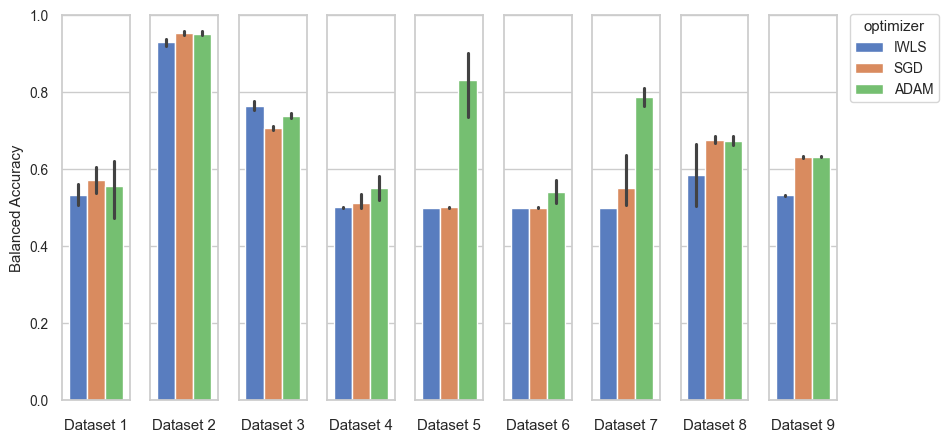

In [7]:
tmp = df.loc[df["optimizer"].isin(["IWLS", "SGD", "ADAM"])]

fig, axs = plt.subplots(1, 9, figsize=(10, 5), sharey=True)

for i in range(9):
    sns.barplot(data=tmp.loc[tmp["dataset"] == i + 1], y="balanced_accuracy", hue="optimizer", legend=i==8, ax=axs[i])
    axs[i].set_ylim(0, 1)
    axs[i].set_xlabel(f"Dataset {i+1}")

sns.move_legend(axs[8], "upper right", bbox_to_anchor=(2.6, 1.02))
axs[0].set_ylabel("Balanced Accuracy")
plt.subplots_adjust(wspace=0.3)
plt.savefig("images/experiment3.2_barplot.png", dpi=300, bbox_inches="tight")
plt.show()

### 3.3 - convergence analysis

In [7]:
cost_frames = []
for i in range(9):
    dataset = i + 1
    for optimizer in ["IWLS", "SGD", "ADAM"]:
        for split in range(NUMBER_OF_SPLITS):
            cost_in_iterations = df.loc[df["dataset"].eq(dataset) & df["optimizer"].eq(optimizer) & df["split"].eq(split), "cost_in_iterations"].iloc[0]
            frame = pd.DataFrame(data=cost_in_iterations, columns=["cost"])
            frame["iteration"] = range(1, frame.shape[0] + 1)
            frame["split"] = split
            frame["optimizer"] = optimizer
            frame["dataset"] = dataset
            cost_frames.append(frame)

cost_df = pd.concat(cost_frames)
cost_df

,cost,iteration,split,optimizer,dataset
0,3.837635,1,0,IWLS,1
1,7.888483,2,0,IWLS,1
2,3.624433,3,0,IWLS,1
3,8.101685,4,0,IWLS,1
4,3.624433,5,0,IWLS,1
...,...,...,...,...,...
495,0.635337,496,4,ADAM,9
496,0.635103,497,4,ADAM,9
497,0.635006,498,4,ADAM,9
498,0.635142,499,4,ADAM,9


In [14]:
# the average number of iterations before triggering the stopping rule

(
    cost_df
    .groupby(["dataset", "optimizer", "split"])["iteration"].max()
    .reset_index()
    .pivot_table(index="optimizer", columns="dataset", values="iteration", aggfunc="mean")
    .style
    .format(precision=0)
)

dataset,1,2,3,4,5,6,7,8,9
optimizer,,,,,,,,,
ADAM,415,191,193,500,500,500,500,320,415
IWLS,500,321,27,500,28,500,500,406,500
SGD,500,415,141,500,397,500,500,63,500


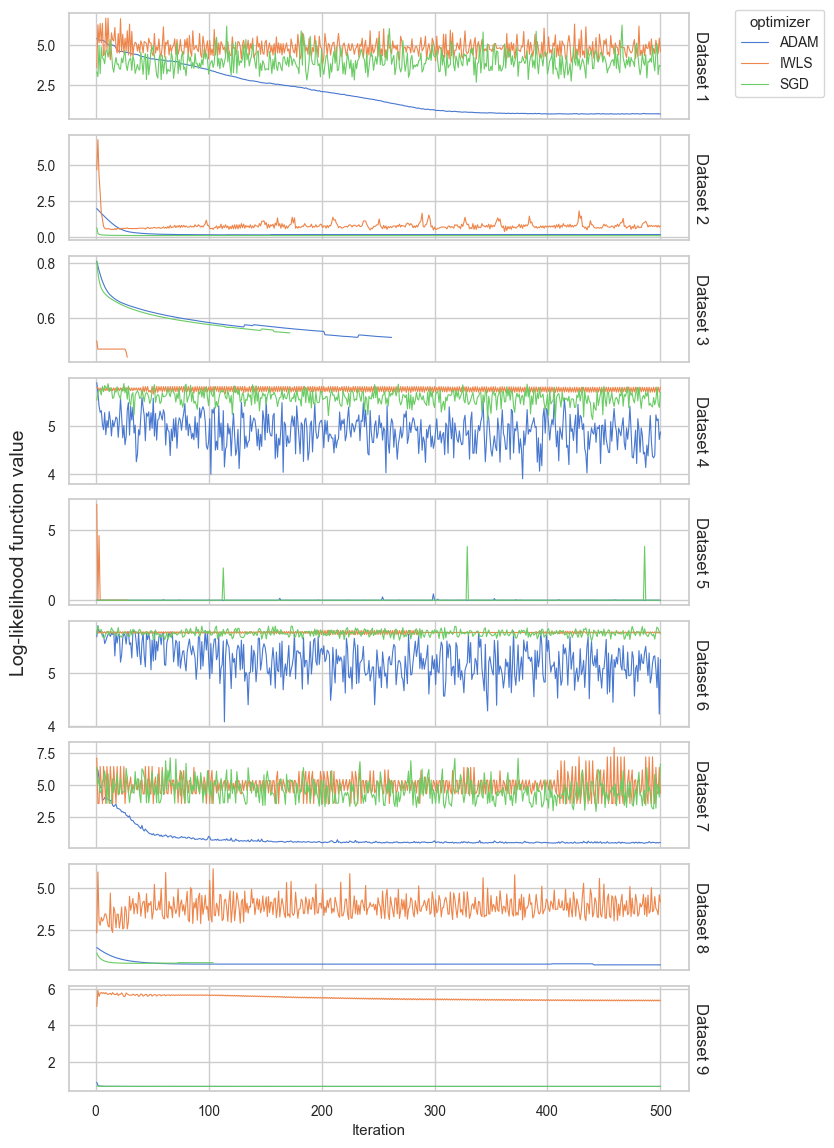

In [10]:
average_cost = cost_df.groupby(["iteration", "optimizer", "dataset"])["cost"].mean().reset_index()

fig, axs = plt.subplots(9, 1, figsize=(8, 14), sharex=True)

for i in range(9):
    sns.lineplot(
        data=average_cost.loc[average_cost["dataset"] == i + 1], 
        x="iteration", 
        y="cost",
        hue="optimizer",
        linewidth=0.8,
        legend=i==0,
        ax=axs[i]
    )
    axs[i].text(
        1.02, 0.5, 
        f"Dataset {i+1}",
        rotation=-90,
        fontsize=12,
        horizontalalignment='center',
        verticalalignment='center',
        transform=axs[i].transAxes
    )
    axs[i].set_ylabel(None)

axs[4].text(
    -0.08, 0.5, 
    f"Log-likelihood function value",
    rotation=90,
    fontsize=14,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axs[4].transAxes
)
axs[8].set_xlabel("Iteration")
sns.move_legend(axs[0], "upper right", bbox_to_anchor=(1.23, 1.1))
plt.subplots_adjust(hspace=0.15)
plt.savefig("images/experiment3.3_lineplot.png", dpi=300, bbox_inches="tight")
plt.show()

### 3.4 - comparision with other popular classification methods

In [91]:
summary_df = (
    df
        .groupby(["dataset", "optimizer"])
        ["balanced_accuracy"]
        .mean()
        .reset_index()
        .pivot_table(index="dataset", columns="optimizer", values="balanced_accuracy")
        .loc[:, ["IWLS", "SGD", "ADAM", "LDA", "QDA", "DecisionTree", "RandomForest"]]
)

(
    summary_df
        .style
        .format(precision=3)
        .background_gradient(vmin=0.5, vmax=1.5, cmap="Greens")
)

optimizer,IWLS,SGD,ADAM,LDA,QDA,DecisionTree,RandomForest
dataset,,,,,,,
1,0.533,0.571,0.556,0.713,0.705,0.681,0.703
2,0.931,0.953,0.952,0.970,0.982,0.973,0.986
3,0.765,0.708,0.739,0.749,0.738,0.750,0.777
4,0.501,0.512,0.552,0.648,0.549,0.593,0.655
5,0.500,0.501,0.831,0.885,0.932,0.847,0.857
6,0.500,0.501,0.542,0.821,0.774,1.000,0.987
7,0.500,0.552,0.788,0.789,0.790,0.754,0.794
8,0.584,0.677,0.674,0.669,0.696,0.642,0.686
9,0.532,0.631,0.633,0.632,0.631,0.641,0.678


In [92]:
# balanced accuracy ranking

for i in summary_df.index:
    summary_df.loc[i] = 7 - summary_df.loc[i].sort_values().argsort()

summary_df = summary_df.astype(int)
avg_position = summary_df.mean(axis=0).round(1).astype(str)
summary_df.loc["Avg. ranking position"] = avg_position

summary_df

optimizer,IWLS,SGD,ADAM,LDA,QDA,DecisionTree,RandomForest
dataset,,,,,,,
1,7,5,6,1,2,4,3
2,7,5,6,4,2,3,1
3,2,7,5,4,6,3,1
4,7,6,4,2,5,3,1
5,7,6,5,2,1,4,3
6,7,6,5,3,4,1,2
7,7,6,4,3,2,5,1
8,7,3,4,5,1,6,2
9,7,5,3,4,6,2,1


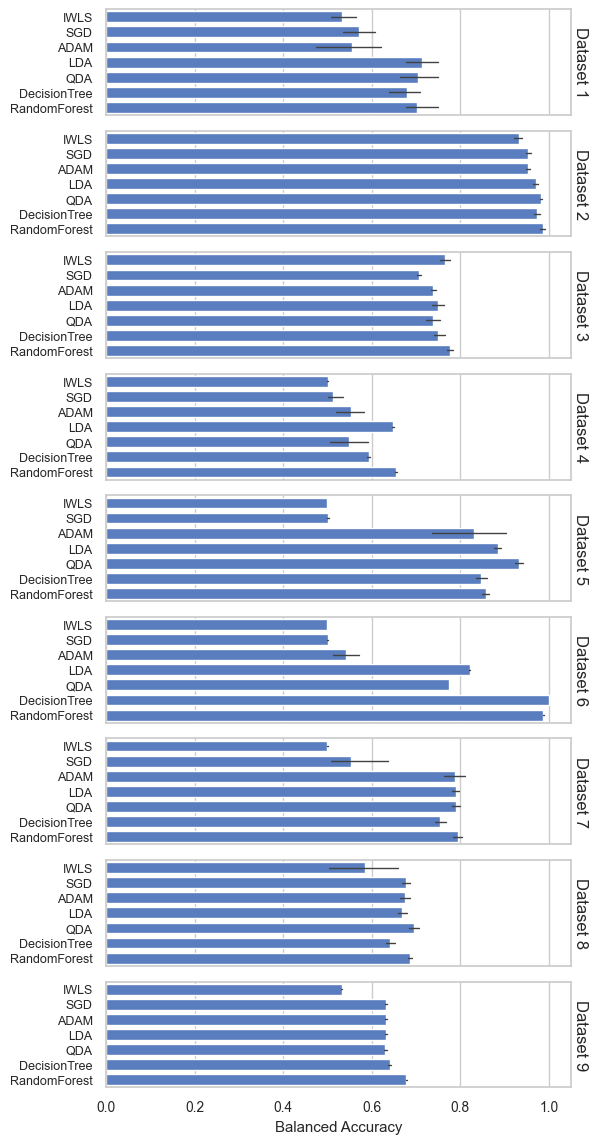

In [13]:
tmp = df.loc[df["optimizer"].isin(["IWLS", "SGD", "ADAM", "LDA", "QDA", "DecisionTree", "RandomForest"])]

fig, axs = plt.subplots(9, 1, figsize=(6, 14), sharex=True)

for i in range(9):
    sns.barplot(
        data=tmp.loc[tmp["dataset"] == i + 1], 
        x="balanced_accuracy", 
        y="optimizer",
        gap=0.1, 
        errwidth=1, 
        ax=axs[i]
    )
    axs[i].set_ylabel(None)
    axs[i].text(
        1.02, 0.5, 
        f"Dataset {i+1}",
        rotation=-90,
        fontsize=12,
        horizontalalignment='center',
        verticalalignment='center',
        transform=axs[i].transAxes
    )
    axs[i].yaxis.set_tick_params(labelsize=9)

axs[8].set_xlabel("Balanced Accuracy")
plt.subplots_adjust(hspace=0.15)
plt.savefig("images/experiment3.4_barplot.png", dpi=300, bbox_inches="tight")
plt.show()

### 3.5 - comparison of models without interactions and models with interactions

In [98]:
(
    df
        .loc[df["dataset"].isin([1, 2, 3])]
        .groupby(["dataset", "optimizer"])
        ["balanced_accuracy"]
        .mean()
        .reset_index()
        .pivot_table(index="dataset", columns="optimizer", values="balanced_accuracy")
        .loc[:, ["IWLS", "SGD", "ADAM", "IWLS+INT", "SGD+INT", "ADAM+INT"]]
        .style
        .format(precision=3)
        .background_gradient(vmin=0.5, vmax=1.5, cmap="Greens")
)

optimizer,IWLS,SGD,ADAM,IWLS+INT,SGD+INT,ADAM+INT
dataset,,,,,,
1,0.533,0.571,0.556,0.529,0.573,0.581
2,0.931,0.953,0.952,0.982,0.990,0.989
3,0.765,0.708,0.739,0.739,0.745,0.744


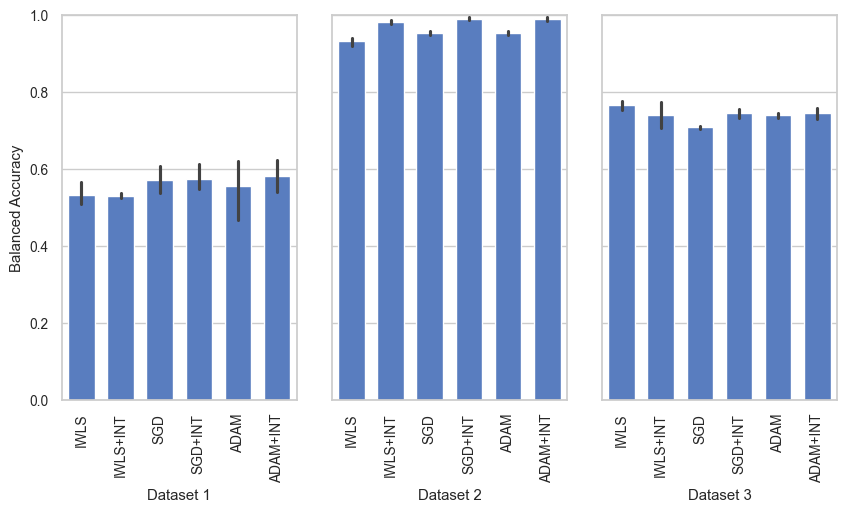

In [15]:
tmp = df.loc[
    df["optimizer"].isin(["IWLS", "SGD", "ADAM", "IWLS+INT", "SGD+INT", "ADAM+INT"]) & 
    (df["dataset"].isin([1, 2, 3]))
]

fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

for i in range(3):
    sns.barplot(
        data=tmp.loc[tmp["dataset"] == i + 1],  
        y="balanced_accuracy",
        x="optimizer",
        gap=0.15,
        ax=axs[i]
    )
    axs[i].set_ylim(0, 1)
    axs[i].set_xlabel(f"Dataset {i+1}")
    axs[i].xaxis.set_tick_params(rotation=90)

axs[0].set_ylabel("Balanced Accuracy")
plt.subplots_adjust(wspace=0.15)
plt.savefig("images/experiment3.5_barplot.png", dpi=300, bbox_inches="tight")
plt.show()